In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('churn_modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
dumie1=pd.get_dummies(df['Geography'],drop_first=True)
dumie2=pd.get_dummies(df['Gender'],drop_first=True)

In [5]:
df=pd.concat([df,dumie1,dumie2],axis=1)

In [6]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Germany,Spain,Male
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [7]:
y=df['Exited']
df=df.drop(['Geography','Gender','Exited'],axis =1)

In [8]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,1,15634602,Hargrave,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,2,15647311,Hill,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,3,15619304,Onio,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,4,15701354,Boni,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,5,15737888,Mitchell,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [9]:
x=df.iloc[:,3:14]

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [11]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [12]:
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [13]:
#!conda install -c conda-forge keras --yes

In [13]:
import keras

Using TensorFlow backend.
C:\Users\HP\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\HP\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\HP\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\HP\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:529: Future

In [14]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

In [15]:
nn=Sequential()
nn.add(Dense(units=10, kernel_initializer='he_normal',activation='relu',input_dim=11))
nn.add(Dense(units=18, kernel_initializer='he_normal',activation='relu'))
nn.add(Dense(units=15, kernel_initializer='he_normal',activation='relu'))
nn.add(Dense(output_dim=1, kernel_initializer='glorot_uniform',activation='sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.


C:\Users\HP\anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(kernel_initializer="glorot_uniform", activation="sigmoid", units=1)`
  """


In [16]:
nn.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [17]:
model_history=nn.fit(x_train,y_train,validation_split=0.33,batch_size=10,nb_epoch=100)

C:\Users\HP\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Instructions for updating:
Use tf.cast instead.
Train on 4689 samples, validate on 2311 samples
Epoch 1/100
4689/4689 [==============================] - 2s 386us/step - loss: 0.4816 - accuracy: 0.7944 - val_loss: 0.4554 - val_accuracy: 0.8079
Epoch 2/100
4689/4689 [==============================] - 1s 153us/step - loss: 0.4263 - accuracy: 0.8236 - val_loss: 0.4348 - val_accuracy: 0.8144
Epoch 3/100
4689/4689 [==============================] - 1s 151us/step - loss: 0.4132 - accuracy: 0.8302 - val_loss: 0.4271 - val_accuracy: 0.8209
Epoch 4/100
4689/4689 [==============================] - 1s 148us/step - loss: 0.4045 - accuracy: 0.8371 - val_loss: 0.4177 - val_accuracy: 0.8243
Epoch 5/100
4689/4689 [==============================] - 1s 148us/step - loss: 0.3967 - accuracy: 0.8360 - val_loss: 0.4151 - val_accuracy: 0.8260
Epoch 6/100
4689/4689 [==============================] - 1s 156us/step - loss: 0.3883 - accuracy: 0.8398 - val_loss: 0.4030 - val_accuracy: 0.8343
Epoch 7/100
4689/4689 

4689/4689 [==============================] - 1s 145us/step - loss: 0.3118 - accuracy: 0.8708 - val_loss: 0.3678 - val_accuracy: 0.8524
Epoch 55/100
4689/4689 [==============================] - 1s 145us/step - loss: 0.3108 - accuracy: 0.8712 - val_loss: 0.3654 - val_accuracy: 0.8546
Epoch 56/100
4689/4689 [==============================] - 1s 146us/step - loss: 0.3097 - accuracy: 0.8710 - val_loss: 0.3653 - val_accuracy: 0.8520
Epoch 57/100
4689/4689 [==============================] - 1s 145us/step - loss: 0.3105 - accuracy: 0.8701 - val_loss: 0.3723 - val_accuracy: 0.8503
Epoch 58/100
4689/4689 [==============================] - 1s 145us/step - loss: 0.3110 - accuracy: 0.8697 - val_loss: 0.3713 - val_accuracy: 0.8520
Epoch 59/100
4689/4689 [==============================] - 1s 145us/step - loss: 0.3095 - accuracy: 0.8712 - val_loss: 0.3694 - val_accuracy: 0.8533
Epoch 60/100
4689/4689 [==============================] - 1s 144us/step - loss: 0.3091 - accuracy: 0.8678 - val_loss: 0.3678 

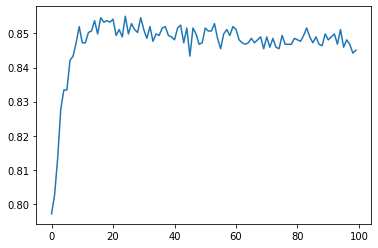

In [26]:
plt.plot(model_history.history['val_accuracy'])

In [19]:
y_pred=nn.predict(x_test)
y_pred=(y_pred>0.5)

In [20]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)

In [21]:
cm

array([[2198,  181],
       [ 284,  337]], dtype=int64)

In [22]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,y_pred)

In [23]:
score

0.845